# **Ali-ai-eyesight is an AI for increasing resolution**
####**-WORKS CONSISTENTLY ON CHROME**
#### **-DOUBLE CHECK YOUR RUNTIME TYPE IS SET TO GPU**
example: an image with height 500px by width 500px scaled to an image with height 1762px by width 1762px

**You might need to go to Runtime>Restart Runtime**

If you open the folder icon (in the left menu) you will see all your files, the good thing about doing **Runtime>Restart Runtime** is that it keeps all the files you downloaded but Restarts the Memory on the Cloud Computer so you can put the ESRGAN model in memory, compared to **Runtime>Factory Reset Runtime** which Restarts the whole Cloud Computer to a default clear state.


In [ ]:
#@markdown # **1) Download required Libraries**
# # Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models
%cd ..

In [ ]:
#@markdown # **2) Upload image using the DIALOG box! Wait till it loads the image and once it's done run the next block**
#@markdown You can drag and drop into choose files button
%cd ali-ai-vision
import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)
%cd ..

In [ ]:
#@markdown # **3) Run ERSGAN on Uploaded Image**
%cd Real-ESRGAN
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 4 --half --face_enhance
# !python inference_realesrgan.py --model_path experiments/pretrained_models/RealESRGAN_x4plus.pth --input upload --netscale 4 --outscale 3.5 --half --face_enhance
%cd ..

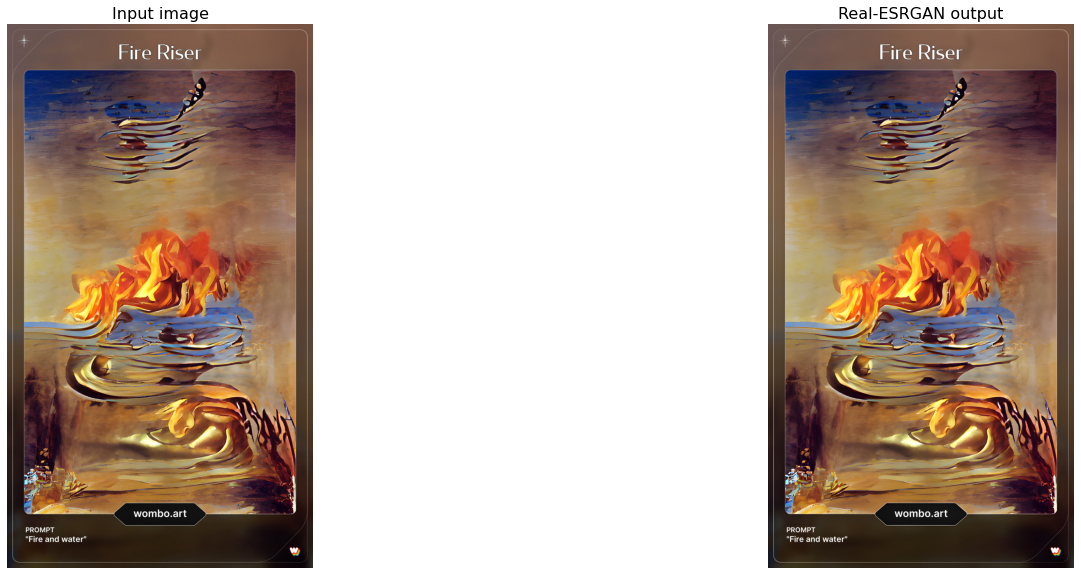

In [8]:
#@markdown # **4) Compare before ESRGAN and after ESRGAN image** (Optional. You can skip this block if you want to)
# utils for visualization
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'Real-ESRGAN/upload'
result_folder = 'Real-ESRGAN/results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

In [9]:
#@markdown # **5) Download Super Enhanced Image**

from google.colab import files

filename= os.listdir('/content/Real-ESRGAN/results')
files.download('/content/Real-ESRGAN/results/'+filename[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>